In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

### Loading data from CCN4, CCN5, CCN6, CCN7 | Months-> 03,04,05 

In [4]:
march = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN4_Counter_03_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
april = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN4_Counter_04_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
may = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN4_Counter_05_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
dataFrames = [march, april, may]
ccn4_ = pd.concat(dataFrames)

In [5]:
march = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN5_Counter_03_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
april = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN5_Counter_04_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
may = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN5_Counter_05_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
dataFrames = [march, april, may]
ccn5_ = pd.concat(dataFrames)

In [6]:
march = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN6_Counter_03_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
april = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN6_Counter_04_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
may = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN6_Counter_05_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
dataFrames = [march, april, may]
ccn6_ = pd.concat(dataFrames)

In [7]:
march = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN7_Counter_03_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
april = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN7_Counter_04_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
may = pd.read_csv('C:\\Users\Saranya Gupta\Desktop\CCN7_Counter_05_2020.gz', compression='gzip', header=None, sep='\s+', quotechar='"')
dataFrames = [march, april, may]
ccn7_ = pd.concat(dataFrames)

### checking size of ccnx_

In [13]:
ccn4_.shape

(1881441, 5)

In [14]:
ccn5_.shape

(1927575, 5)

In [15]:
ccn6_.shape

(2826672, 5)

In [16]:
ccn7_.shape 

(2772091, 5)

In [8]:
ccn4_

,0,1,2,3,4
0,20200301,04:35,CIP-IP-Received-Responses-sdp05.mtn.com.af-CS1...,806,2.69
1,20200301,04:35,CIP-SS7-SDP-14-Total-Requests,1459,4.86
2,20200301,04:35,InapSdf-SDP-14-Total-Requests,1459,4.86
3,20200301,04:35,CdrOutput-Encoded-Successful,2761,9.20
4,20200301,04:35,INAP-Sent-Total-Requests,8508,28.36
...,...,...,...,...,...
684775,20200601,04:30,RelayPdp-IntermediateInterrogation-Successful,8,0.03
684776,20200601,04:30,CAPv2-Sent-U-Aborts,1,0.00
684777,20200601,04:30,Cdr-Files-Sent-To-Primary-FTP-Destination-CCN4...,2,0.01
684778,20200601,04:30,INAP-Sent-U-Aborts,1,0.00


In [9]:
# combining all data together
dataFrames = [ccn4_, ccn5_, ccn6_, ccn7_]
total_df = pd.concat(dataFrames)
total_df.shape
total_df

,0,1,2,3,4
0,20200301,04:35,CIP-IP-Received-Responses-sdp05.mtn.com.af-CS1...,806,2.69
1,20200301,04:35,CIP-SS7-SDP-14-Total-Requests,1459,4.86
2,20200301,04:35,InapSdf-SDP-14-Total-Requests,1459,4.86
3,20200301,04:35,CdrOutput-Encoded-Successful,2761,9.20
4,20200301,04:35,INAP-Sent-Total-Requests,8508,28.36
...,...,...,...,...,...
938921,20200601,04:30,Voice-Charging-FirstInterrogation-InternalError,1,0.00
938922,20200601,04:30,Dcc-Failed-Answered-172.29.67.213-SCAP_V.2.0@e...,1,0.00
938923,20200601,04:30,Dcc-Received-Requests-172.29.67.213-SCAP_V.2.0...,1,0.00
938924,20200601,04:30,CAPv3GPRS-Received-P-Aborts,1,0.00


### Voice filters - separation of data based on the following filters 
*Voice-Charging-FirstInterrogation-Successful
*Voice-Charging-IntermediateInterrogation-Successful
*Voice-Charging-FinalReport-Successful

In [20]:
# checking for all 3 filters 
Voice_Traffic=total_df.loc[((total_df[2].str.match('Voice-Charging-FirstInterrogation-Successful')|total_df[2].str.match('Voice-Charging-IntermediateInterrogation-Successful'))|total_df[2].str.match('Voice-Charging-FinalReport-Successful'))]
Voice_Traffic.sort_values(by=[0,1], inplace=True)
Voice_Traffic['Year'] = Voice_Traffic[0].astype(str).str[0:4]
Voice_Traffic['Month'] = Voice_Traffic[0].astype(str).str[-4:-2]
Voice_Traffic['Day'] = Voice_Traffic[0].astype(str).str[-2:]
Voice_Traffic

C:\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,0,1,2,3,4,Year,Month,Day
22,20200301,04:35,Voice-Charging-FinalReport-Successful,575,1.92,2020,03,01
25,20200301,04:35,Voice-Charging-IntermediateInterrogation-Succe...,100,0.33,2020,03,01
30,20200301,04:35,Voice-Charging-FirstInterrogation-Successful,666,2.22,2020,03,01
21,20200301,04:35,Voice-Charging-FinalReport-Successful,917,3.06,2020,03,01
26,20200301,04:35,Voice-Charging-IntermediateInterrogation-Succe...,128,0.43,2020,03,01
...,...,...,...,...,...,...,...,...
1067643,20200601,04:30,Voice-Charging-IntermediateInterrogation-Succe...,176,0.59,2020,06,01
1067652,20200601,04:30,Voice-Charging-FirstInterrogation-Successful,10447,34.82,2020,06,01
938847,20200601,04:30,Voice-Charging-FinalReport-Successful,8069,26.90,2020,06,01
938850,20200601,04:30,Voice-Charging-IntermediateInterrogation-Succe...,146,0.49,2020,06,01


### SMS Filters
Messaging-Charging-Originating-Sms

In [11]:
SMS_Traffic=total_df.loc[total_df[2].str.match('Messaging-Charging-Originating-Sms')]
SMS_Traffic.sort_values(by=[0,1], inplace=True)
SMS_Traffic['Year'] = SMS_Traffic[0].astype(str).str[0:4]
SMS_Traffic['Month'] = SMS_Traffic[0].astype(str).str[-4:-2]
SMS_Traffic['Day'] = SMS_Traffic[0].astype(str).str[-2:]
SMS_Traffic

C:\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,0,1,2,3,4,Year,Month,Day
41,20200301,04:35,Messaging-Charging-Originating-Sms,82,0.27,2020,03,01
23,20200301,04:35,Messaging-Charging-Originating-Sms,72,0.24,2020,03,01
57,20200301,04:35,Messaging-Charging-Originating-Sms,83,0.28,2020,03,01
116,20200301,04:40,Messaging-Charging-Originating-Sms,76,0.25,2020,03,01
84,20200301,04:40,Messaging-Charging-Originating-Sms,76,0.25,2020,03,01
...,...,...,...,...,...,...,...,...
938799,20200601,04:25,Messaging-Charging-Originating-Sms,286,0.95,2020,06,01
684747,20200601,04:30,Messaging-Charging-Originating-Sms,399,1.33,2020,06,01
646503,20200601,04:30,Messaging-Charging-Originating-Sms,338,1.13,2020,06,01
1067680,20200601,04:30,Messaging-Charging-Originating-Sms,432,1.44,2020,06,01


### Summing up the count for all individual dates for all CCNs

#### VOICE TRAFFIC FOR ALL CCN, MONTHS: March, April, May

In [22]:
uniqueValues =Voice_Traffic[0].unique()
vt = pd.DataFrame(uniqueValues)

def vTraffic(ele):
    return Voice_Traffic.loc[Voice_Traffic[0]==ele][3].sum()
  
vt['Count']=vt.apply(lambda x: vTraffic(x[0]),axis=1)
vt

,0,Count
0,20200301,58639804
1,20200302,58993645
2,20200303,57313250
3,20200304,56896150
4,20200305,58033487
...,...,...
88,20200528,100152819
89,20200529,95798075
90,20200530,103211123
91,20200531,100956449


Text(0.5, 0, 'Date')

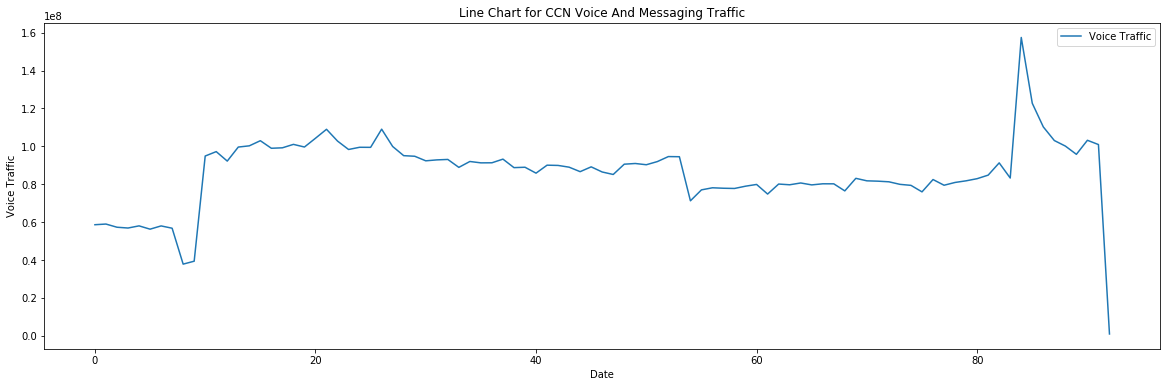

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.title("Line Chart for CCN Voice And Messaging Traffic")
sns.lineplot(data=vt['Count'], label="Voice Traffic")
plt.ylabel("Voice Traffic")
plt.xlabel("Date")

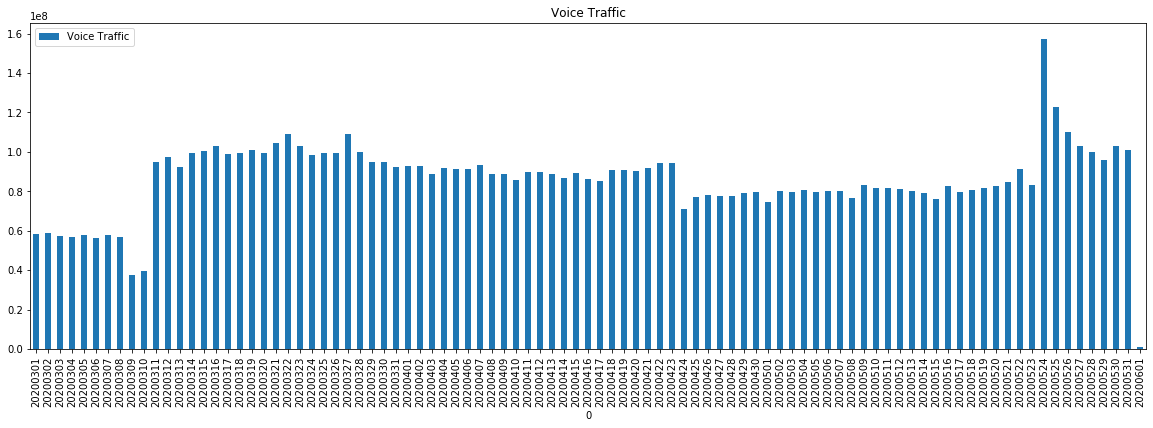

In [46]:
vt.plot.bar(x=0, y="Count", rot=90, title="Voice Traffic",figsize=(20,6), label="Voice Traffic")

In [12]:
uniqueValues =SMS_Traffic[0].unique()
st = pd.DataFrame(uniqueValues)

def sTraffic(ele):
    return SMS_Traffic.loc[SMS_Traffic[0]==ele][3].sum()
  
st['Count']=st.apply(lambda x: sTraffic(x[0]),axis=1)
st

,0,Count
0,20200301,1214404
1,20200302,1248251
2,20200303,1253244
3,20200304,1391814
4,20200305,1340188
...,...,...
88,20200528,1829262
89,20200529,1826079
90,20200530,1905530
91,20200531,1982957


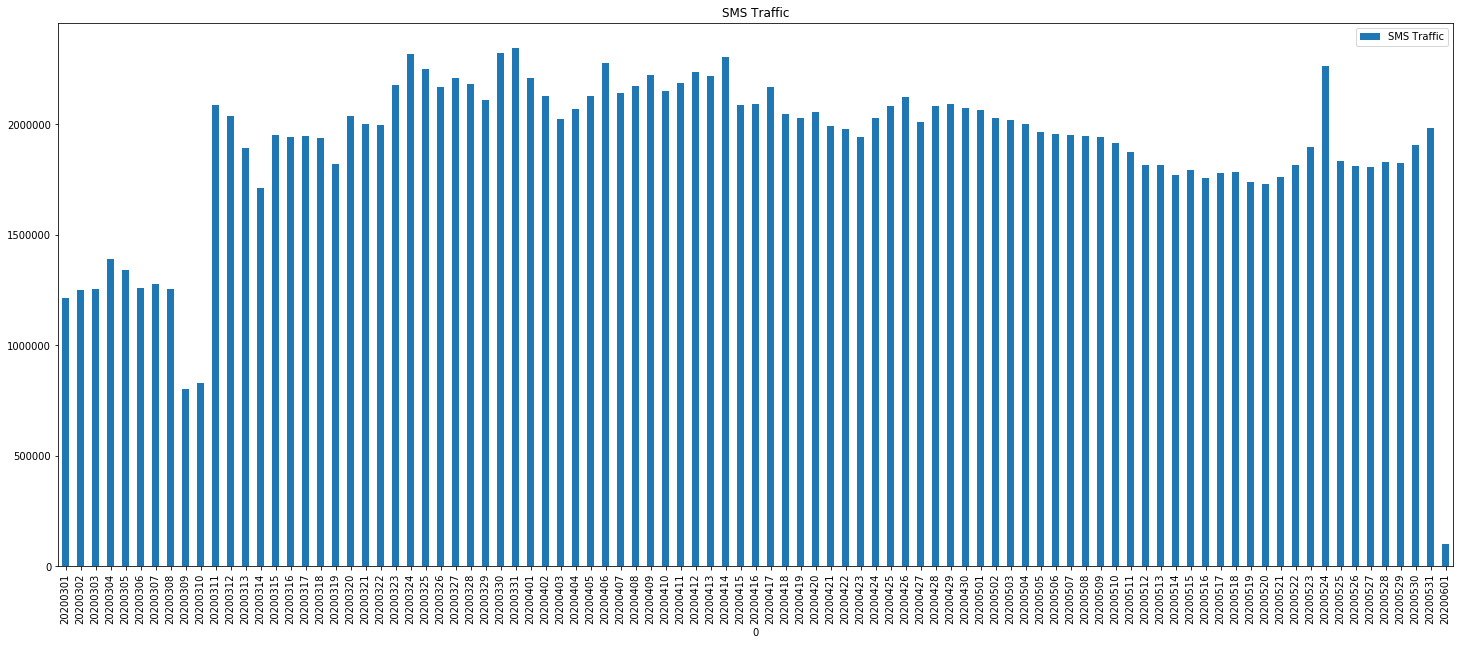

In [13]:
st.plot.bar(x=0, y="Count", rot=90, title="SMS Traffic",figsize=(25,10), label="SMS Traffic")